In [47]:
import numpy as np
import math
import matplotlib.pylab as plt

In [48]:
u=np.ones(3)
v=np.ones(3)
u1=np.ones(3)
v1=np.ones(3)
g=np.ones(3)
g1=np.ones(3)
e=0
b=0
theta=0
d=1

Функция, пересчитывающая скорости после столкновения

In [49]:
def col (u,v,e,b):
    g=u-v
    theta=2*np.arccos(b/d)
    g2=np.sqrt(g[0]**2+g[1]**2)
    g1[0]=g[0]*np.cos(theta)-g[0]*g[2]*np.cos(e)*np.sin(theta)/g2+g[0]*g[1]*np.sin(e)*np.sin(theta)/g2
    g1[1]=g[1]*np.cos(theta)-g[1]*g[2]*np.cos(e)*np.sin(theta)/g2+g[0]*g[1]*np.sin(e)*np.sin(theta)/g2
    g1[2]=g[2]*np.cos(theta)+g2*np.cos(e)*np.sin(theta)
    u1=u*0.5+v*0.5+g1*0.5
    v1=(u+v)*0.5-g1*0.5
    return u1, v1

In [50]:
def countr(i,j,k):
    E1=v[0][i]**2+v[1][j]**2+v[2][k]**2+v[0][k1]**2+v[1][k2]**2+v[2][k3]**2
    E2=v[0][i-k1+j1]**2+v[1][j-k2+j2]**2+v[2][k-k3+j3]**2+v[0][j1]**2+v[1][j2]**2+v[2][j3]**2
    r=(E0-E1)/(E2-E1)
    return (r)

In [51]:
def dist(v,i,j,k):
    a =4*math.pi*(np.sqrt(1/(2*math.pi)))**3*np.exp(-((v[0][i]-3)**2+(v[1][j]-3)**2+(v[2][k]-3)**2)/(2))+4*math.pi*(np.sqrt(1/(2*math.pi)))**3*np.exp(-((v[0][i]+3)**2+(v[1][j]+3)**2+(v[2][k]+3)**2)/(2))
    return a

Проверка

In [52]:
vtest=np.random.randn(3)
utest=np.random.randn(3)
u1,v1=col(vtest,utest,0,0)
def test(u1, v1):
    if (np.round(utest+vtest,6) == np.round(u1+v1,6)).all() and round(utest[0]**2+utest[1]**2+utest[2]**2+vtest[0]**2+vtest[1]**2+vtest[2]**2,6) == round(u1[0]**2+u1[1]**2+u1[2]**2+v1[0]**2+v1[1]**2+v1[2]**2,6):
        return ("Correct")
    else:
        return ("Incorrect")
test(u1,v1)

'Correct'

Сетка

In [90]:
deltat=0.1
B=0
k=1
T=1
m=1
v0=np.sqrt(k*T/m)
delta=v0/2
vcut=10*v0
M=vcut/delta
v=[[(0.5+k)*delta for k in range(int(-M-1),int(M+1))] for j in range(3)]
f=np.zeros((int(2*M)+2,int(2*M)+2,int(2*M)+2))
f1 = np.zeros((int(2*M)+2,int(2*M)+2,int(2*M)+2))
C=16*math.pi*vcut**3/(delta)**3
for i in range(0,int(2*M)+2):
    for j in range(0,int(2*M)+2):
        for k in range(0,int(2*M)+2):
            f[i][j][k] = float(dist(v,i,j,k))

Генерация скоростей (индексов из сетки)

In [91]:
for o in range(100000):
    b=np.random.rand()
    e=np.random.uniform(0,2*math.pi)
    i1=np.random.randint(int(-M-1),int(M+1))
    i2=np.random.randint(int(-M-1),int(M+1))
    i3=np.random.randint(int(-M-1),int(M+1))
    j1=np.random.randint(int(-M-1),int(M+1))  
    j2=np.random.randint(int(-M-1),int(M+1))
    j3=np.random.randint(int(-M-1),int(M+1))
    u1,v1=col(np.array([v[0][i1],v[1][i2],v[2][i3]]),np.array([v[0][j1],v[1][j2],v[2][j3]]),e,b)
    if abs(u1[0])<10 and abs(u1[1])<10 and abs(u1[2])<10 and abs(v1[0])<10 and abs(v1[1])<10 and abs(v1[2])<10:
        k1=int(round((u1[0]+10.25)/delta))
        k2=int(round((u1[1]+10.25)/delta))
        k3=int(round((u1[2]+10.25)/delta))
        l1=int(round((v1[0]+10.25)/delta))
        l2=int(round((v1[1]+10.25)/delta))
        l3=int(round((v1[2]+10.25)/delta))
        u2=np.ones(3)
        v2=np.ones(3)
        u2[0]=v[0][int(k1)]
        u2[1]=v[1][int(k2)]
        u2[2]=v[2][int(k3)]
        v2[0]=v[0][int(l1)]
        v2[1]=v[1][int(l2)]
        v2[2]=v[2][int(l3)]
        E0=v[0][i1]**2+v[1][i2]**2+v[2][i3]**2+v[0][j1]**2+v[1][j2]**2+v[2][j3]**2
        q=np.ones(3)
        for i in range(k1-1,k1+2):
            for j in range(k2-1,k2+2):
                for k in range(k3-1,k3+2):
                    r = countr(i,j,k)
                    if r<1 and r>0:
                        q[0]=i
                        q[1]=j
                        q[2]=k
                        break
                    else:
                        continue
        if r<1 and r>0 and f[k1][k2][k3] >0 and f[l1][l2][l3]>0 and f[int(q[0])][int(q[1])][int(q[2])] > 0 and f[int(q[0]-k1+l1)][int(q[1]-k2+l2)][int(q[2]-k3+l3)]>0 and f[int(i1+M)][int(i2+M)][int(i3+M)]>0 and f[int(j1+M)][int(j2+M)][int(j3+M)]>0 and f[k1][k2][k3]*f[l1][l2][l3] < np.inf and f[int(q[0])][int(q[1])][int(q[2])]*f[int(q[0]-k1+l1)][int(q[1]-k2+l2)][int(q[2]-k3+l3)]<np.inf and f[int(i1+M)][int(i2+M)][int(i3+M)]*f[int(j1+M)][int(j2+M)][int(j3+M)] < np.inf:
            B=B+C*((f[k1][k2][k3]*f[l1][l2][l3])**(1-r)*(f[int(q[0])][int(q[1])][int(q[2])]*f[int(q[0]-k1+l1)][int(q[1]-k2+l2)][int(q[2]-k3+l3)])**r-f[int(i1+M)][int(i2+M)][int(i3+M)]*f[int(j1+M)][int(j2+M)][int(j3+M)])
            if np.isnan(B):
                print(o,r,B)
                print(f[k1][k2][k3])
                print(f[l1][l2][l3])
                print(f[int(q[0])][int(q[1])][int(q[2])])
                print(f[int(q[0]-k1+l1)][int(q[1]-k2+l2)][int(q[2]-k3+l3)])
                print(f[int(i1+M)][int(i2+M)][int(i3+M)])
                print(f[int(j1+M)][int(j2+M)][int(j3+M)])
            f[int(i1+M)][int(i2+M)][int(i3+M)]=f[int(i1+M)][int(i2+M)][int(i3+M)]-B*deltat
            f[int(j1+M)][int(j2+M)][int(j3+M)]=f[int(j1+M)][int(j2+M)][int(j3+M)]-B*deltat
            f[k1][k2][k3]=f[k1][k2][k3]+r*B*deltat
            f[int(l1)][int(l2)][int(l3)]=f[int(l1)][int(l2)][int(l3)]+r*B*deltat
            f[int(q[0])][int(q[1])][int(q[2])]=f[int(q[0])][int(q[1])][int(q[2])]+(1-r)*B*deltat
            f[int(q[0]-k1+l1)][int(q[1]-k2+l2)][int(q[2]-k3+l3)]=f[int(q[0]-k1+l1)][int(q[1]-k2+l2)][int(q[2]-k3+l3)]+(1-r)*B*deltat

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars


In [78]:
u1,v1=col(np.array([v[0][i1],v[1][i2],v[2][i3]]),np.array([v[0][j1],v[1][j2],v[2][j3]]),e,b)

In [67]:
def dist(v,i,j,k):
    f[i][j][k]=4*math.pi*(v[0][i]**2+v[1][j]**2+v[2][k]**2)*(np.sqrt(1/(2*math.pi)))**3*np.exp(-(v[0][i]**2+v[1][j]**2+v[2][k]**2)/(0.5))+4*math.pi*((v[0][i]**2+v[1][j]**2+v[2][k]**2)*20)*(np.sqrt(1/(2*math.pi)))**3*np.exp(-(v[0][i]**2+v[1][j]**2+v[2][k]**2)*20/(0.5))
    return f

In [68]:
def disttest(v):
    f=4*math.pi*(np.sqrt(1/(2*math.pi)))**3*np.exp(-(v-2)**2)+4*math.pi*(np.sqrt(1/(2*math.pi)))**3*np.exp(-(v+2)**2)
    return f

In [69]:
p=np.arange(-10,10,0.1)

<function matplotlib.pyplot.show(*args, **kw)>

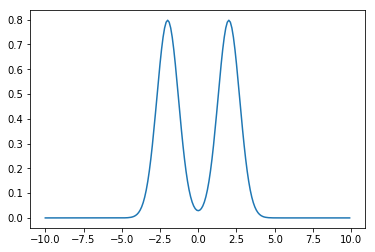

In [70]:
fig=plt.figure()
plt.plot(p,disttest(p))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

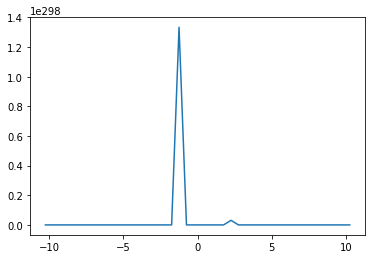

In [107]:
fig=plt.figure()
plt.plot(v[1],f[-1][11])
plt.show